In [120]:
# nn-network decode numbers
# one-hot encoding
# input 784 degree
# output 10 degree
# stochastic gradient descent

In [121]:
%env KERAS_BACKEND = tensorflow
%matplotlib inline

env: KERAS_BACKEND=tensorflow


In [122]:
import numpy as np
import matplotlib.pyplot as plt

In [123]:
from keras.datasets import mnist

In [124]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [125]:
print(len(x_train))

60000


In [126]:
print(len(y_train))

60000


In [127]:
# show number 9487's data

In [128]:
print(x_train[9487].shape)

(28, 28)


In [129]:
print(x_train[9487])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 240 253 165   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  32 241 252 252   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2 141 252 252 252  98   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  30 252 252 252 252 149   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  21 217 252 252 252 14

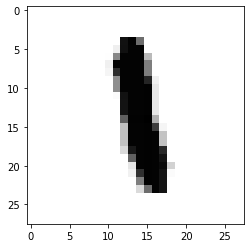

In [130]:
plt.imshow(x_train[9487], cmap='Greys')

In [131]:
x_train.shape

(60000, 28, 28)

In [132]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [133]:
x_train.shape

(60000, 784)

In [134]:
#one-hot encoding

In [135]:
from keras.utils import np_utils

In [136]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [137]:
y_train[9487]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [138]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [139]:
#input

In [140]:
model = Sequential()

In [141]:
#兩層神經網路
# Activation(激發函數)

In [142]:
model.add(Dense(500,input_dim = 784))
model.add(Activation('sigmoid'))

In [143]:
model.add(Dense(500))
model.add(Activation('sigmoid'))

In [144]:
#output: one-hot encoding

In [145]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [146]:
# 組裝

In [147]:
model.compile(loss='mse', optimizer=SGD(lr=0.1),metrics=['accuracy'])

In [148]:
#檢視

In [149]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_9 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_10 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5010      
_________________________________________________________________
activation_11 (Activation)   (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
________________________________________________

In [150]:
# 392500
#input_degree*first_layer+bios(number of first_layer)

784*500 + 500

392500

In [151]:
#250500
#first_degree*second_layer+bios(number of second_layer)

500*500+500

250500

In [152]:
#5010

500*10+10

5010

In [153]:
# draw the picture of nural network

In [154]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model01.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [155]:
#train

In [156]:
x_train.shape

(60000, 784)

In [157]:
model.fit(x_train,y_train,batch_size=100, epochs=20)
#batch_size: 每次大小
#epochs: 次數

Epoch 1/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0879 - accuracy: 0.2618
Epoch 2/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0690 - accuracy: 0.5754
Epoch 3/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0484 - accuracy: 0.7538
Epoch 4/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0343 - accuracy: 0.8442
Epoch 5/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0263 - accuracy: 0.8716
Epoch 6/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0217 - accuracy: 0.8867
Epoch 7/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0191 - accuracy: 0.8950
Epoch 8/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0170 - accuracy: 0.9054
Epoch 9/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0156 - accuracy: 0.9132
Epoch 10/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0145 - accuracy: 0.9167

In [158]:
# view the trained network

In [160]:
from ipywidgets import interact_manual

In [161]:
predict = model.predict_classes(x_test)

In [162]:
def test(test_name):
    plt.imshow(x_test[test_name].reshape(28,28),cmap='Greys')
    print('神經網路判斷為: ', predict[test_name])

In [163]:
interact_manual(test, test_name = (0,9999))

interactive(children=(IntSlider(value=4999, description='test_name', max=9999), Button(description='Run Intera…

<function __main__.test(test_name)>

In [164]:
# store this network

In [165]:
model_json = model.to_json()
open('handwriting_model_architecture.json','w').write(model_json)
model.save_weights('handwriting_model_weights.h5')

In [167]:
# score it 

In [168]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0108 - accuracy: 0.9318


In [166]:
# use this network